# Nettoyage des données

#### Gestion des imports

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from scipy import stats

#### Import des données et premières visualisations

In [4]:
df = pd.read_csv('4072eb5e-e963-4a17-a794-3ea028d0a9c4.csv', sep=',')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Test de la librairie missingno

<Axes: >

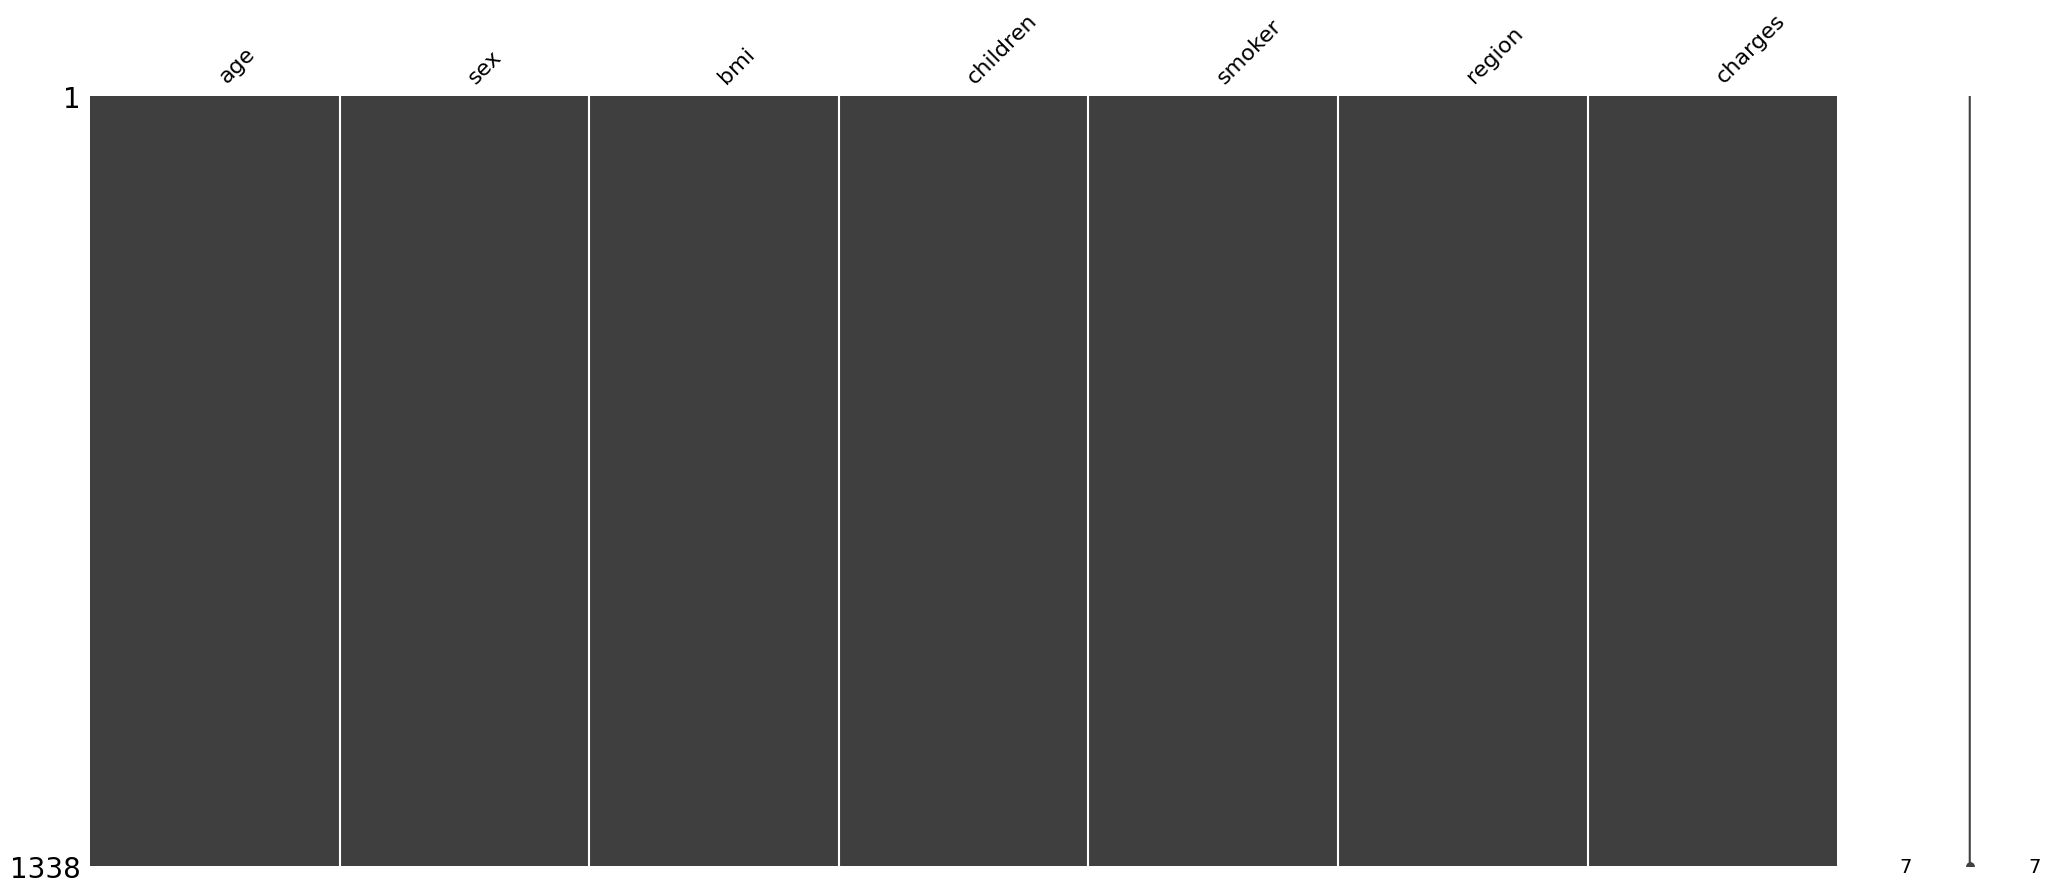

In [17]:
msno.matrix(df)

<Axes: >

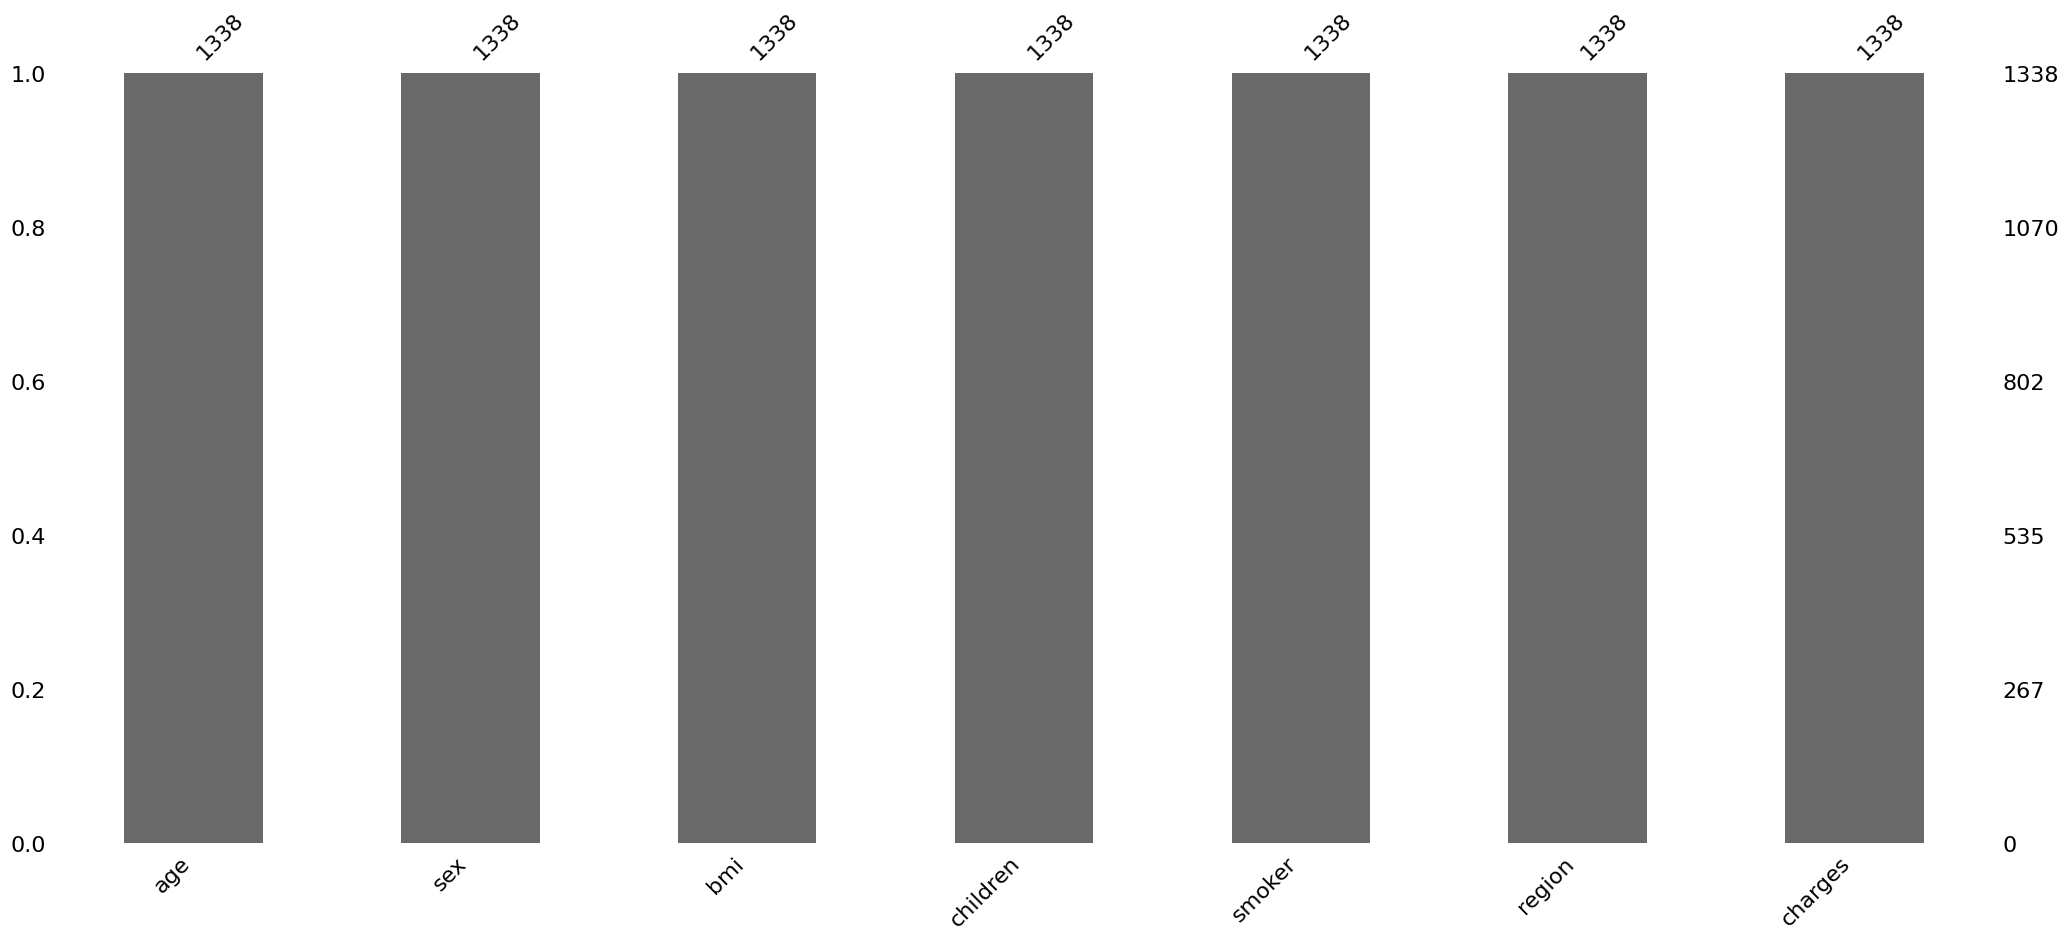

In [16]:
msno.bar(df)

/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

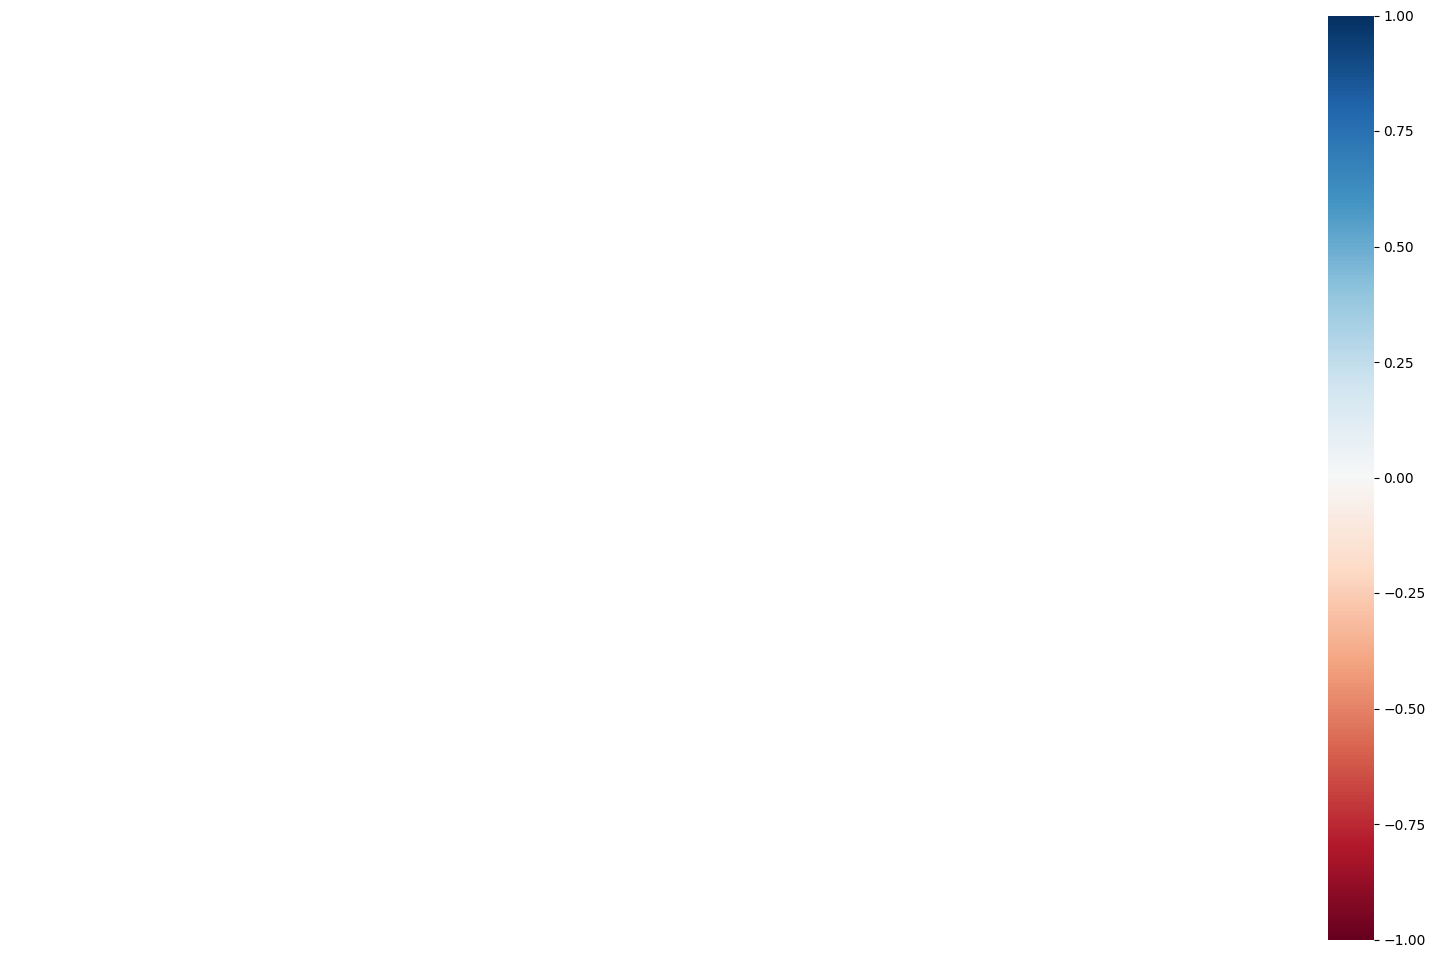

In [19]:
msno.heatmap(df)

Il semble qu'il n'y ait aucune donnée manquante dans ce dataset

#### Vérification des doublons

In [98]:
df.duplicated().count()
df.duplicated().sum()
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [99]:
df.drop_duplicates(inplace=True)
#le inplace =True permet de supprimer la ligne directement dans le df sans passer par del

In [100]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Un unique doublon a été trouvé et supprimé

# Identification des valeurs aberrantes

In [125]:
df.shape[1]


7

In [126]:
def mean(x):
    mean_list=[]
    std_list=[]
    for i in range(0, x.shape[1]):
        mu=x.iloc[:,i].mean()
        mean_list.append(mu)
        std=x.iloc[:,i].std()
        std_list.append(std)
        return mean_list, std_list
mean(df)


([np.float64(39.222139117427076)], [np.float64(14.044332734156425)])

In [128]:
#IQR ou InterQuantile Range
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

#calculate IQR for 'continue' columns
df[['charges', 'children', 'bmi', 'age']].apply(find_iqr)

# valeurs_aberantes = df[(df[colonne]<limite_inf) | (df[colonne]>limite_sup)]

charges     11911.37345
children        2.00000
bmi             8.41000
age            24.00000
dtype: float64

In [151]:
def find_max_min(x):
    max_,min_=np.percentile(x, [75,25])
    return max_, min_
columns = ['charges', 'children', 'bmi', 'age']

#find_max_min(df[columns])
for i in columns:
    max_, min_=find_max_min(df[i])
    valeurs_aberrantes=df[columns][(df[i]>max_) | (df[i]<min_)]
    print(f"Valeurs aberrantes pour la colonne {i} : {valeurs_aberrantes}")
valeurs_aberrantes.value_counts()

# for i in columns:
#valeurs_aberrantes = df[(df[columns]<find_max_min(i)[1]) | (df[columns]<find_max_min(i)[0]) ]
#valeurs_aberantes = df[(df[colonne]<limite_inf) | (df[colonne]>limite_sup)]

Valeurs aberrantes pour la colonne charges :           charges  children     bmi  age
0     16884.92400         0  27.900   19
1      1725.55230         1  33.770   18
2      4449.46200         3  33.000   28
3     21984.47061         0  22.705   33
4      3866.85520         0  28.880   32
...           ...       ...     ...  ...
1328  22395.74424         2  24.225   23
1334   2205.98080         0  31.920   18
1335   1629.83350         0  36.850   18
1336   2007.94500         0  25.800   21
1337  29141.36030         0  29.070   61

[668 rows x 4 columns]
Valeurs aberrantes pour la colonne children :           charges  children     bmi  age
2      4449.46200         3  33.000   28
7      7281.50560         3  27.740   37
25    14001.13380         3  27.720   59
32     4687.79700         5  28.600   19
36    15612.19335         3  32.965   62
...           ...       ...     ...  ...
1314  18765.87545         3  23.655   30
1318  19496.71917         4  39.710   35
1320   5425.02335       

charges      children  bmi    age
63770.42801  0         47.41  54     1
1121.87390   0         23.21  18     1
1131.50660   0         30.14  18     1
1135.94070   0         33.33  18     1
47291.05500  2         31.30  64     1
                                    ..
1149.39590   0         43.01  18     1
1146.79660   0         41.14  18     1
1141.44510   0         37.29  18     1
1137.46970   0         34.43  18     1
1137.01100   0         34.10  18     1
Name: count, Length: 660, dtype: int64

Identification via le Z score

In [ ]:
df['z_charges']=stats.zscore(df

<Axes: title={'center': 'Charges per age'}, xlabel='age', ylabel='charges'>

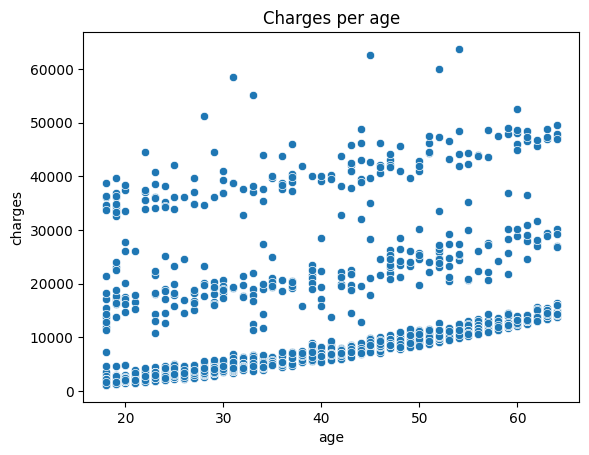

In [101]:
#plt.figure(figsize=(10,6))
plt.title('Charges per age')
sns.scatterplot(x=df.age, y=df.charges)


<Axes: title={'center': 'Charges per bmi'}, xlabel='bmi', ylabel='charges'>

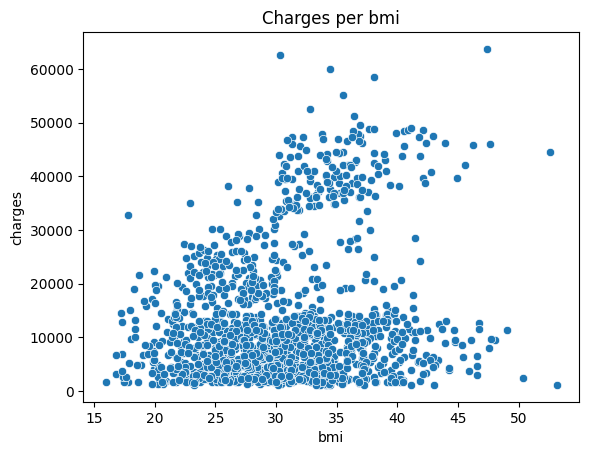

In [102]:
plt.title('Charges per bmi')
sns.scatterplot(x=df.bmi, y=df.charges)

<Axes: title={'center': 'Charges per bmi'}, xlabel='bmi', ylabel='charges'>

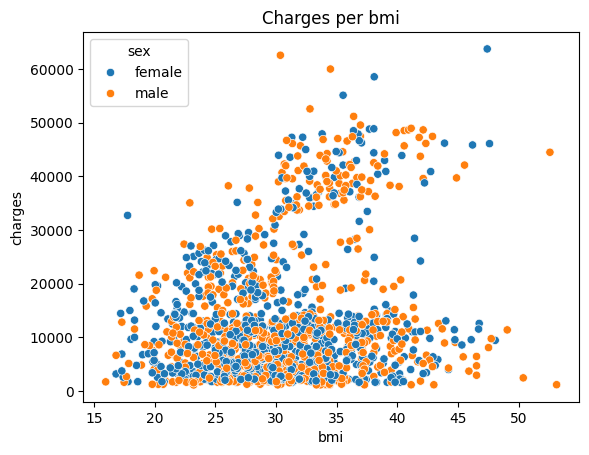

In [103]:
plt.title('Charges per bmi')
sns.scatterplot(x='bmi', y='charges', data=df, hue='sex')

/tmp/ipykernel_103347/1236225600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.smoker, y=df.charges, palette='flare')


<Axes: title={'center': 'Charges for smokers and non-smokers'}, xlabel='smoker', ylabel='charges'>

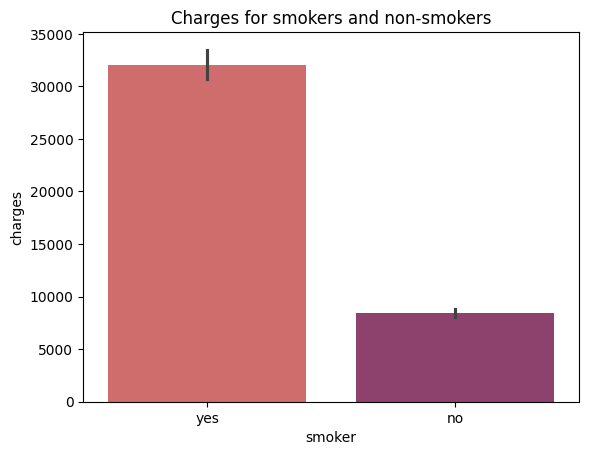

In [104]:
plt.title('Charges for smokers and non-smokers')
sns.barplot(x=df.smoker, y=df.charges, palette='flare')

/tmp/ipykernel_103347/508977280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.sex, y=df.charges, palette='pastel')


<Axes: title={'center': 'Charges for females and males'}, xlabel='sex', ylabel='charges'>

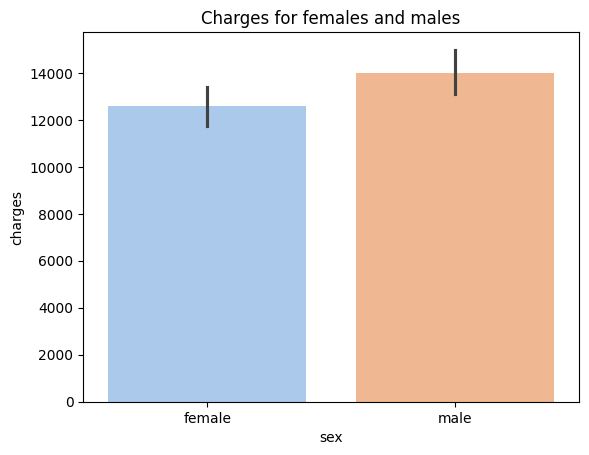

In [105]:
plt.title('Charges for females and males')
sns.barplot(x=df.sex, y=df.charges, palette='pastel')

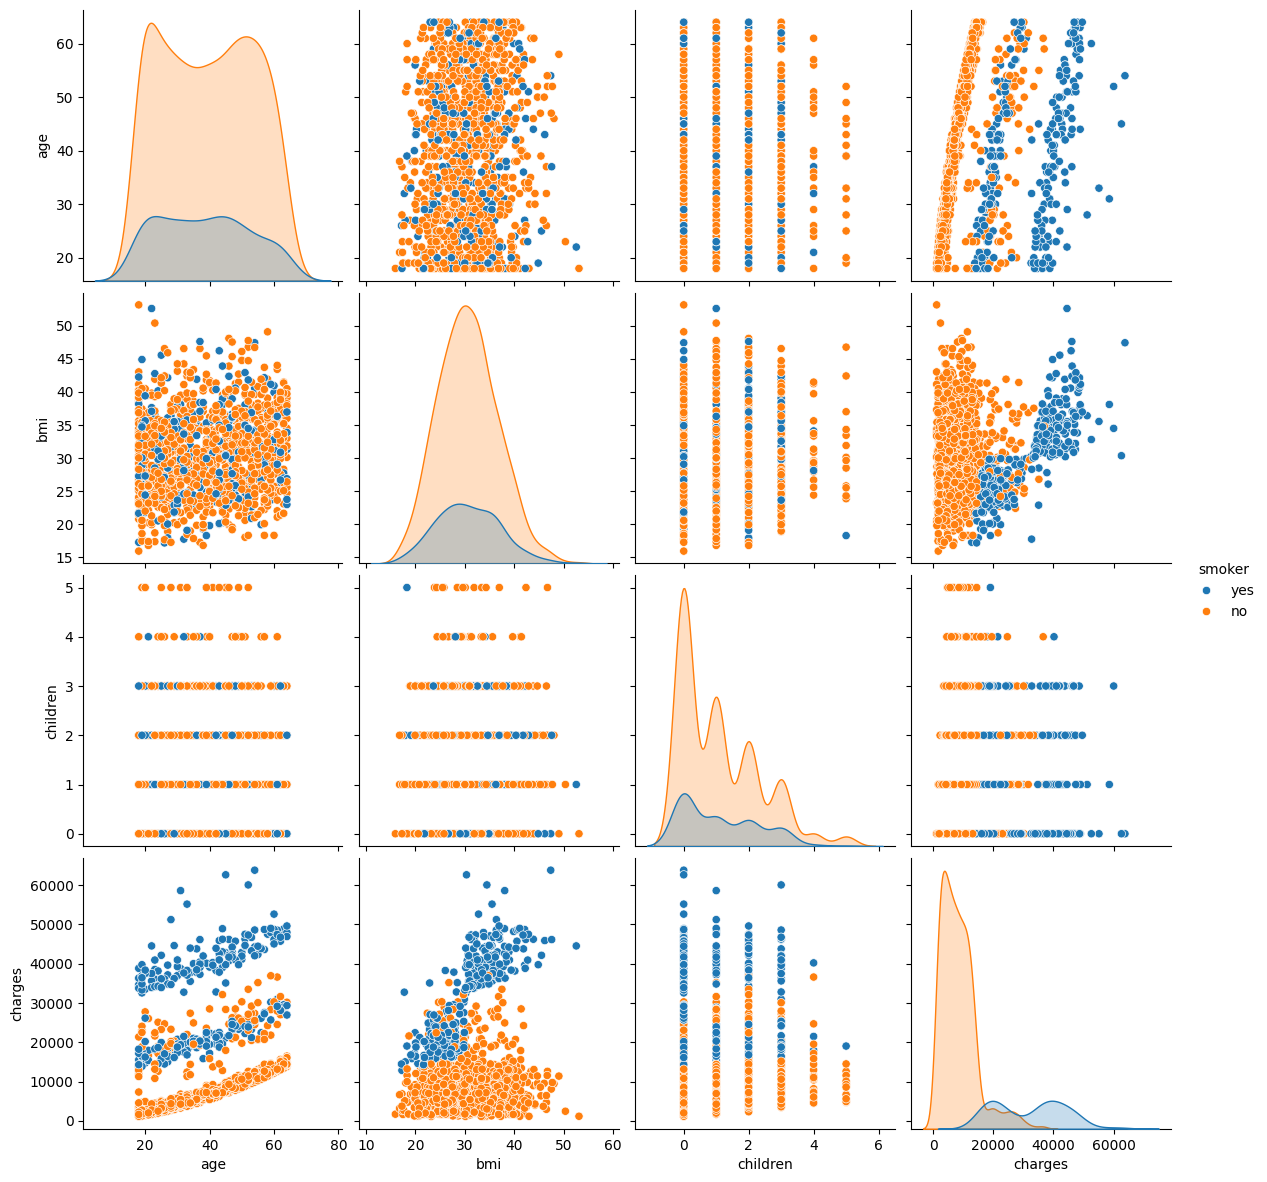

In [106]:
sns.pairplot(df, hue="smoker", height=3)

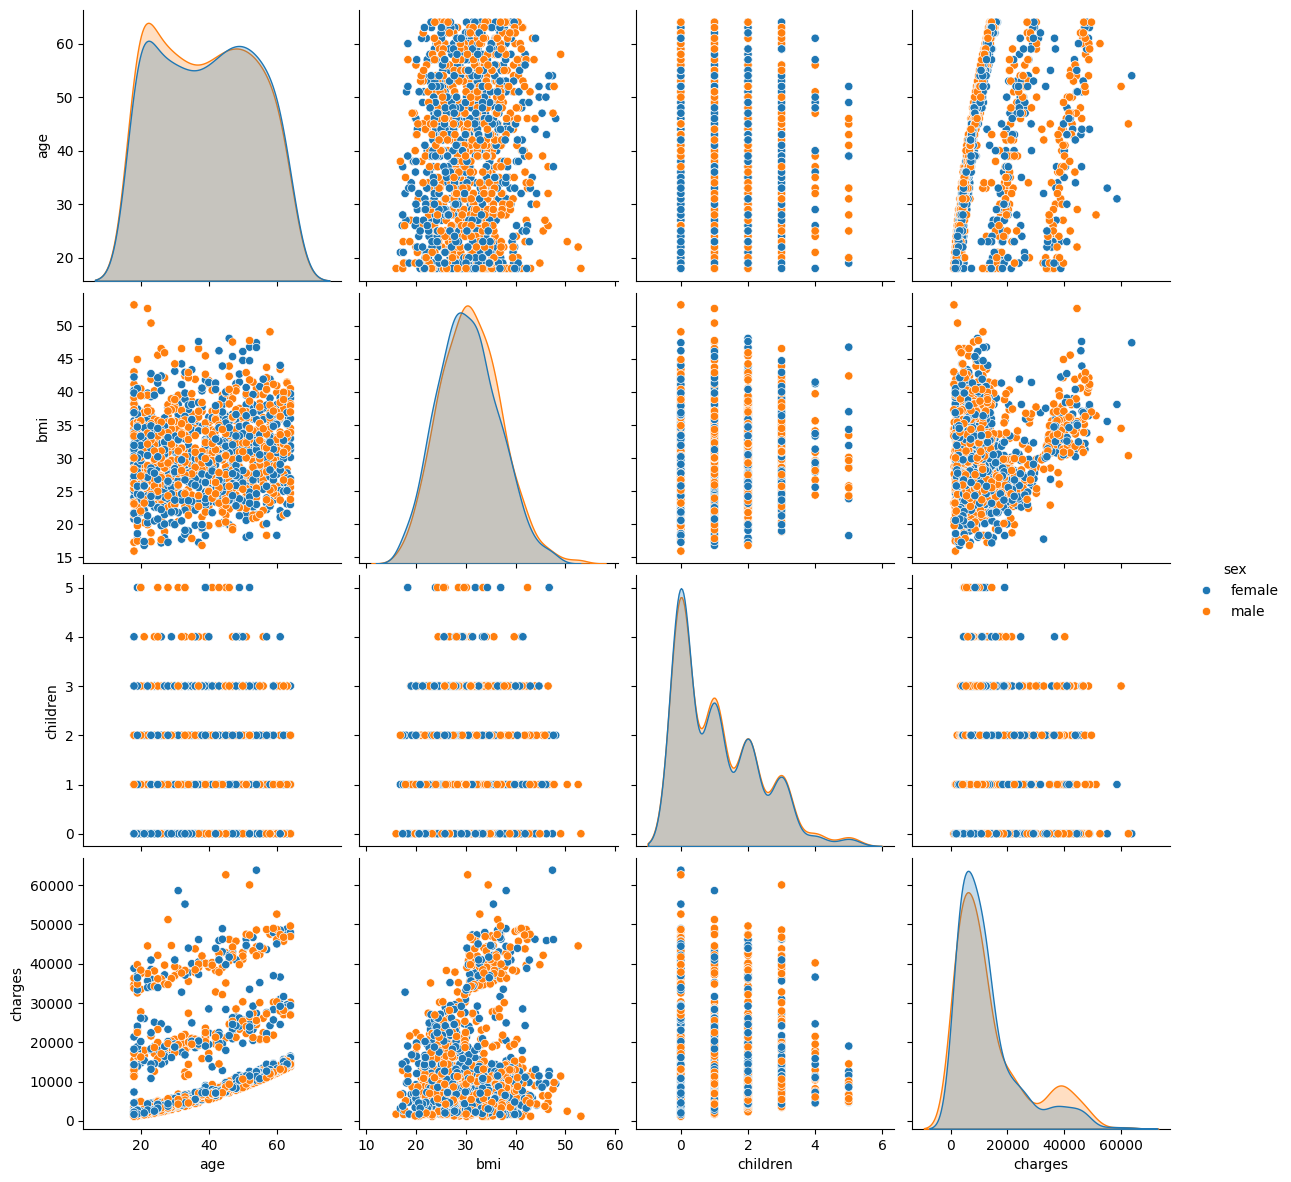

In [107]:
sns.pairplot(df, hue="sex", height=3)

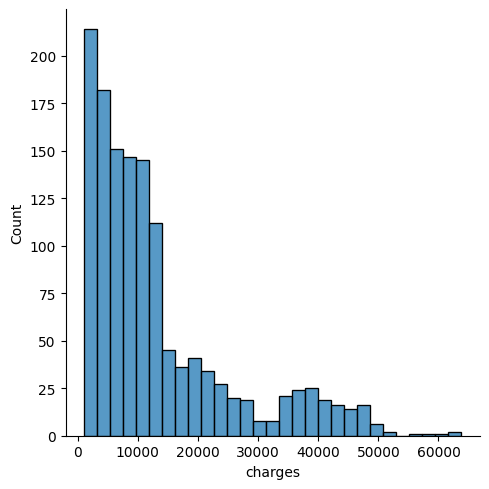

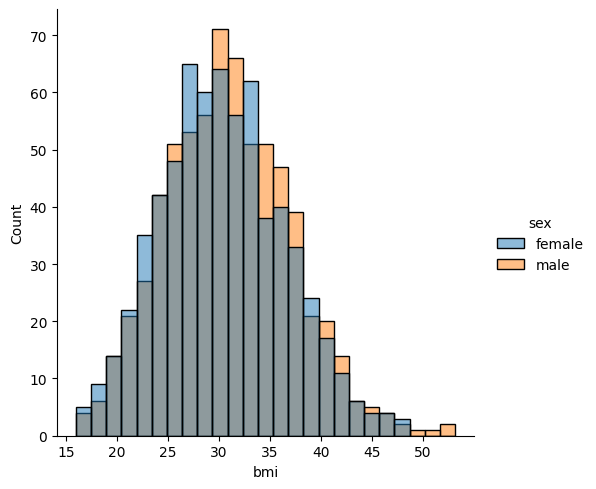

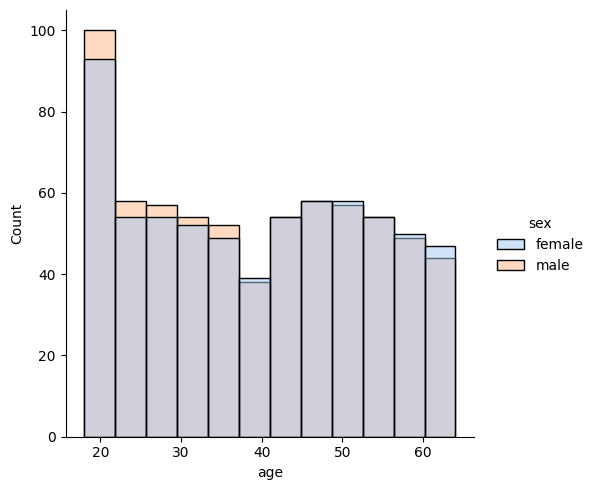

In [108]:
sns.displot(df, x="charges")
sns.displot(df, x="bmi", hue='sex')
sns.displot(df, x="age", hue='sex', palette='pastel')

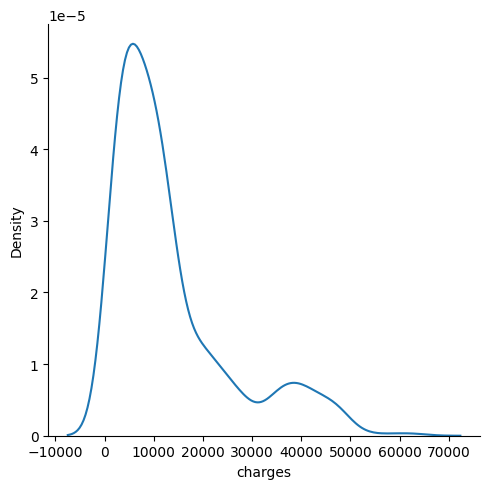

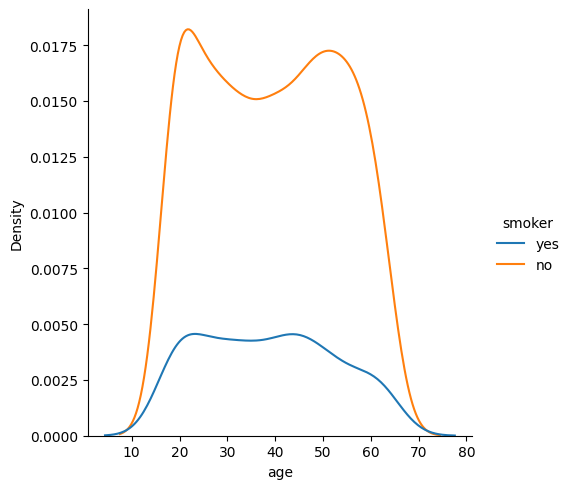

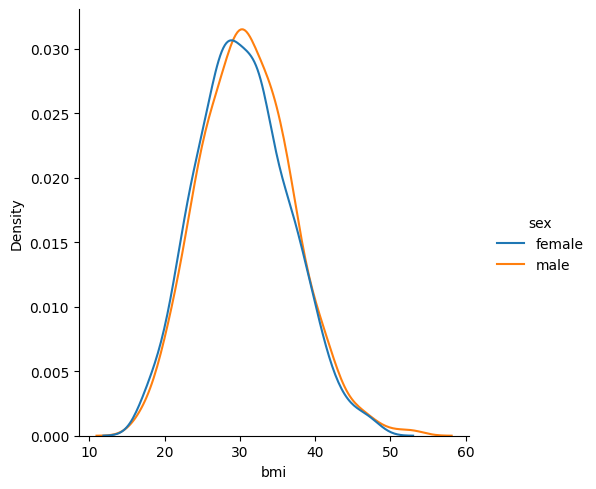

In [109]:
#Kernel density estimation
sns.displot(df, x="charges", kind="kde")
sns.displot(df,x="age", kind="kde", hue="smoker")
sns.displot(df, x="bmi", kind='kde', hue="sex")

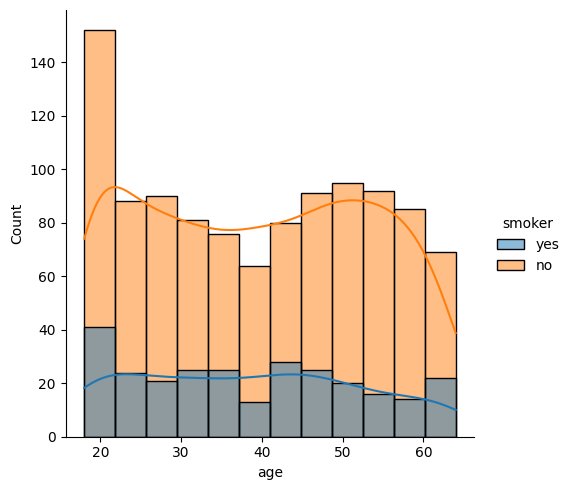

In [110]:
sns.displot(df,x="age", kde=True, hue="smoker")

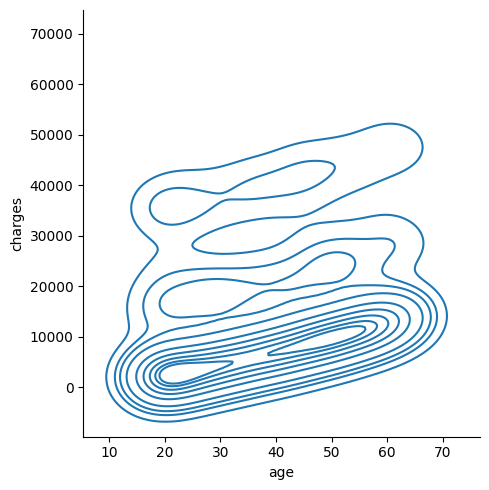

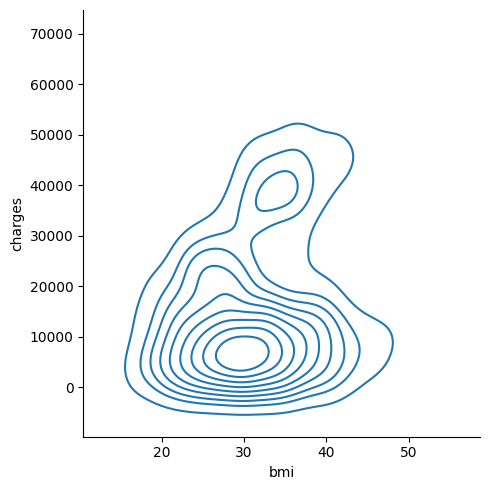

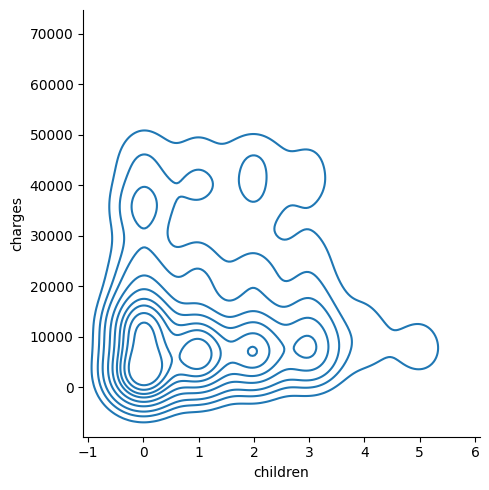

In [111]:
#analyse bivariée
sns.displot(df, x="age", y="charges", kind="kde")
sns.displot(df, x="bmi", y="charges", kind="kde")
sns.displot(df, x="children", y="charges", kind="kde")

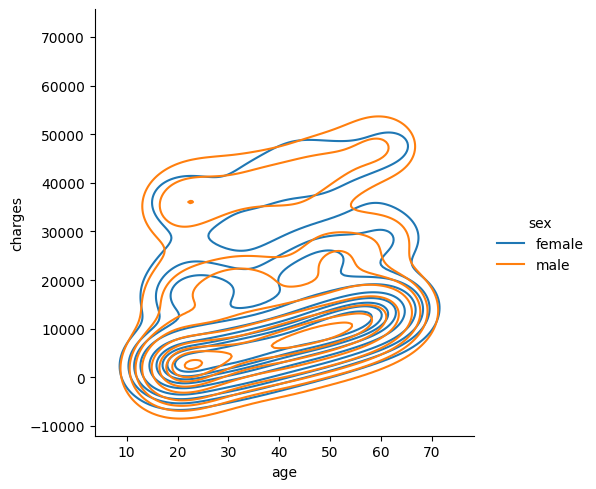

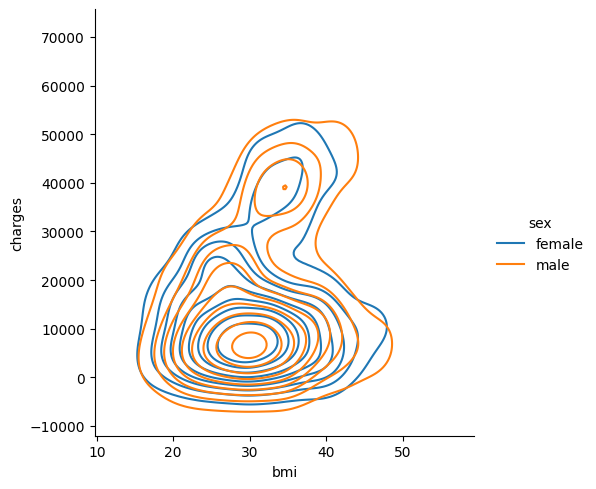

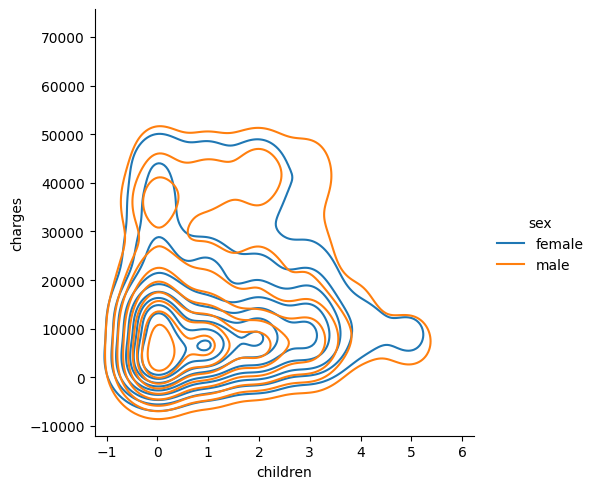

In [112]:
#analyse bivariée fonction du sexe
sns.displot(df, x="age", y="charges", kind="kde", hue="sex")
sns.displot(df, x="bmi", y="charges", kind="kde", hue="sex")
sns.displot(df, x="children", y="charges", kind="kde", hue="sex")

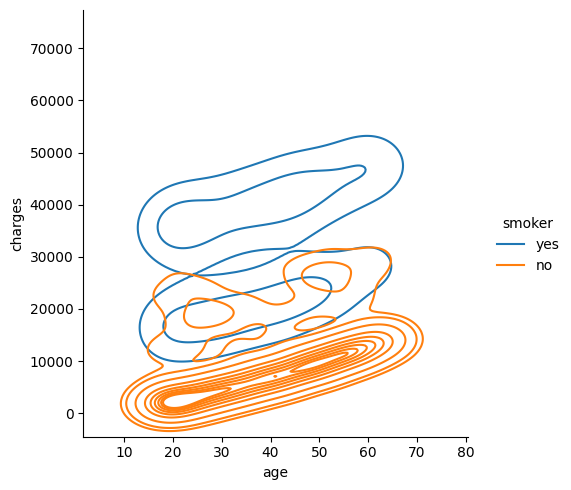

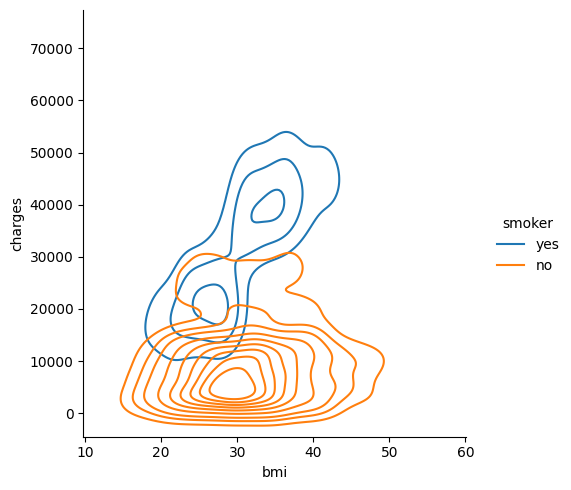

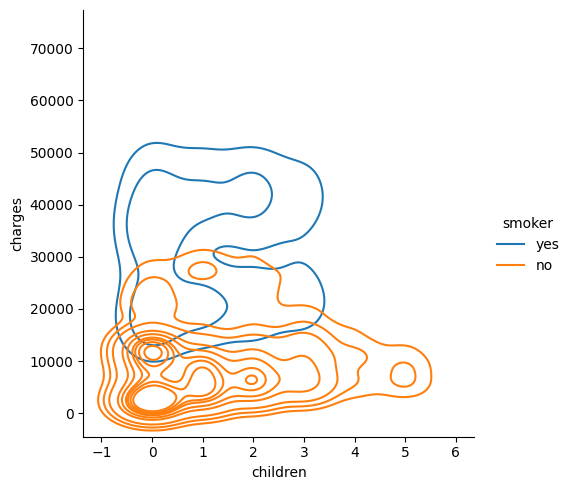

In [113]:
#analyse bivariée fonction des fumeurs et non fumeurs
sns.displot(df, x="age", y="charges", kind="kde", hue="smoker")
sns.displot(df, x="bmi", y="charges", kind="kde", hue="smoker")
sns.displot(df, x="children", y="charges", kind="kde", hue="smoker")

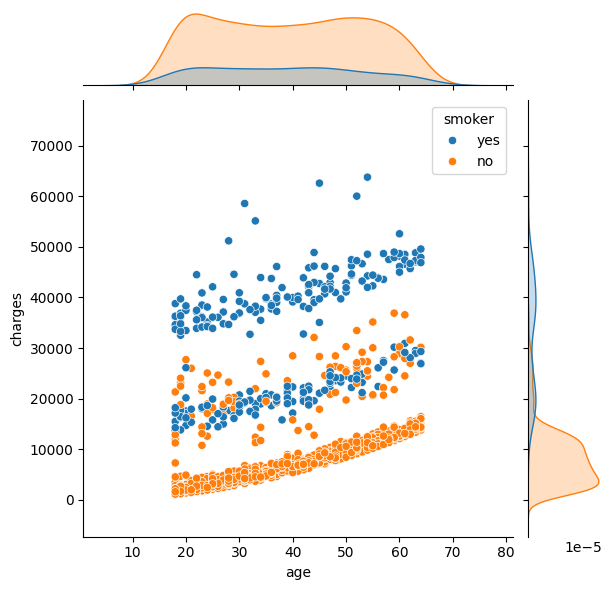

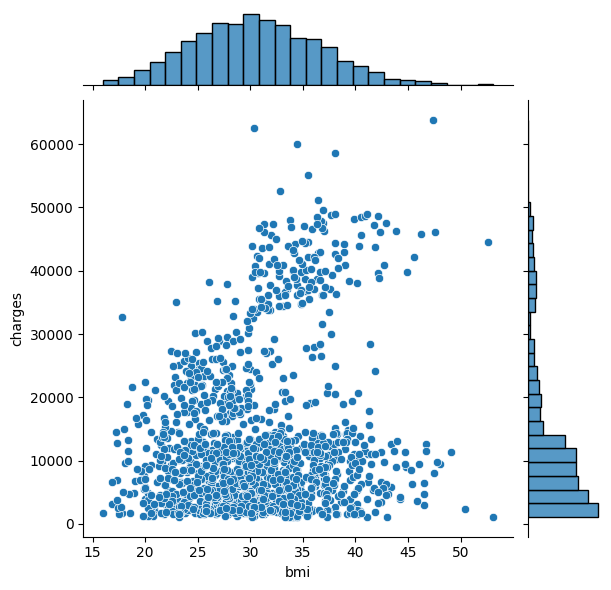

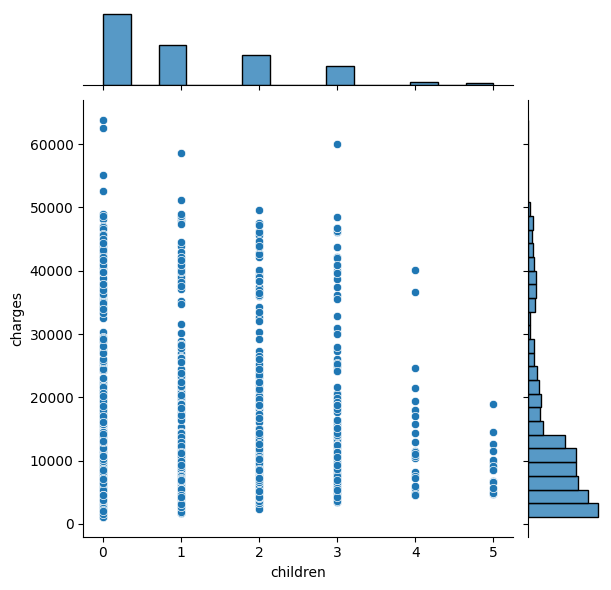

In [114]:
#plotting joint and marginal distributions
sns.jointplot(data=df, x="age", y="charges", hue="smoker")
sns.jointplot(data=df, x="bmi", y="charges")
sns.jointplot(data=df, x="children", y="charges")

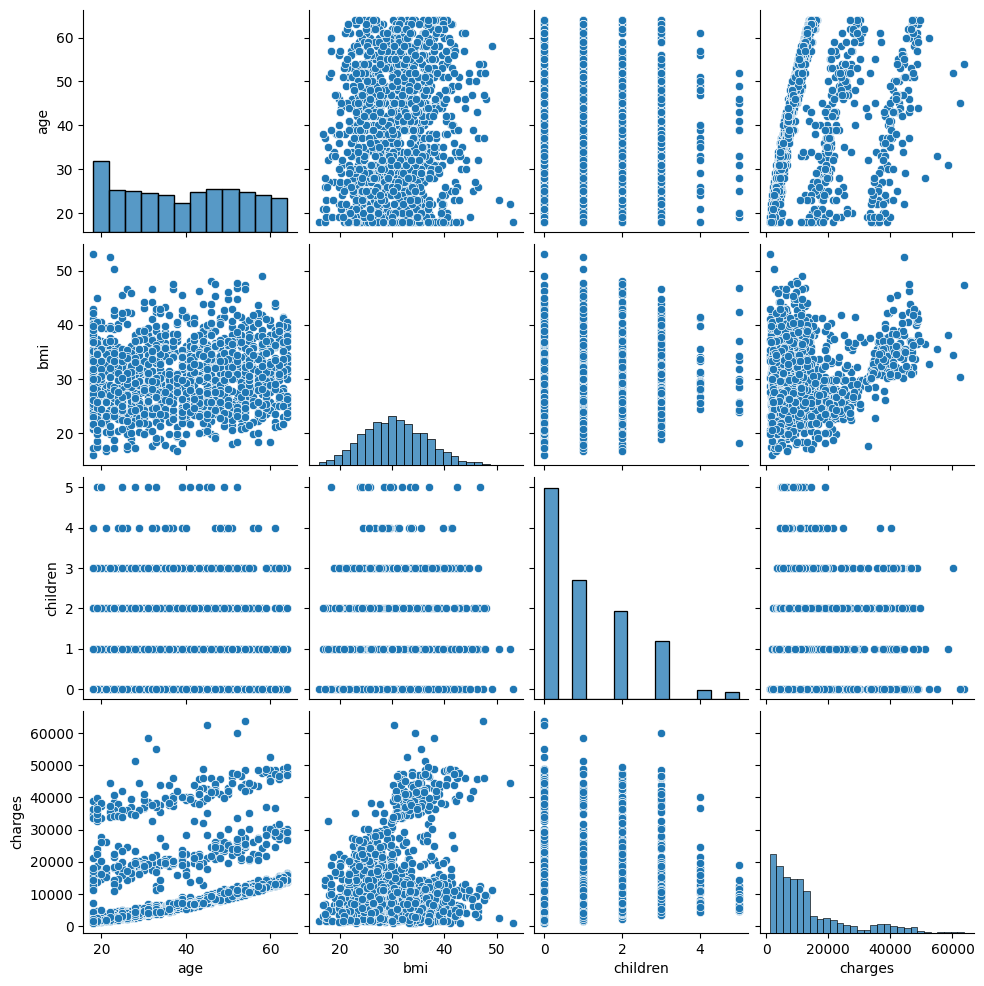

In [115]:
sns.pairplot(df)

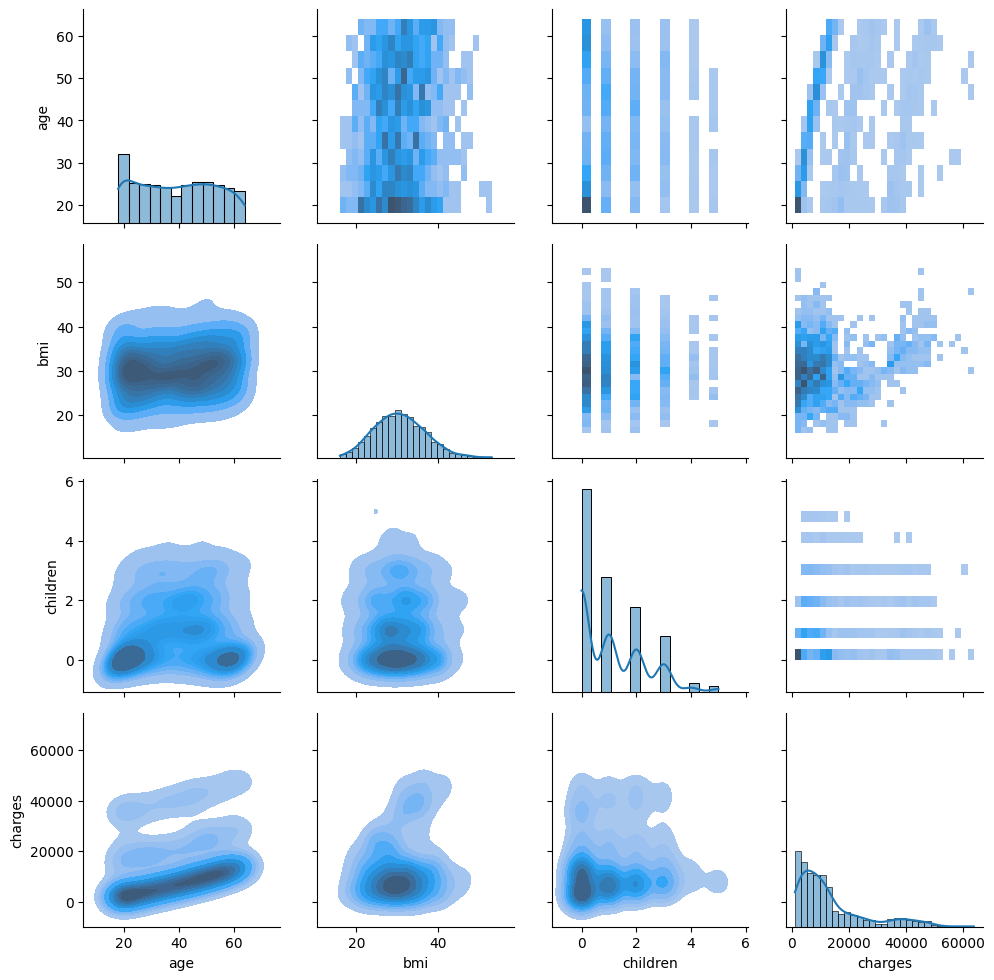

In [116]:
g=sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)